In [1]:
import ccxt
import time
from collections import deque
import pandas as pd
from datetime import datetime

In [7]:
tickers = []
# 코인 종가를 담을 deque 변수
ma25 = deque(maxlen = 25)
ma50 = deque(maxlen = 50)
ma100 = deque(maxlen = 100)

# 티커 조회
binance = ccxt.binance({
    #'apiKey' : 'MPe1dhkEUjkk2FEewGDrIOUK5tMKy0f9QhwWNSRYBWjuMQvX2oMb28H4rxf8K5vA',
    #'secret' : 'p26Mb62MBiNutb6M6RYaHGNZCiVUxe92OogQrPBpVEml0nHKuRshcS19Z0HHfkkI',
    'enableRateLimit' : True,
    'options' : {
        'defaultType' : 'future'
    }
})
markets = binance.load_markets()
markets = pd.DataFrame(markets)
markets = markets.drop(['BTCSTUSDT', 'BTCUSDT_220930', 'ETHUSDT_220930', 'UNFI/USDT'],axis=1)
markets = markets.reset_index(drop=True)

# 데이터프레임에 티커 정보 넣기
df = binance.fetch_ohlcv('BTC/USDT'\
    , timeframe='1d'\
    , limit=400)
df = pd.DataFrame(df, columns = ['date', 'open', 'high', 'low', 'close', 'volume'])

# 일자값이 타임스탬프값이라 변경
for i in range(len(df)):
    now = df.iloc[i][0]
    date = datetime.fromtimestamp(int(now)/1000).strftime('%Y-%m-%d %H:%M:%S')
    df.loc[i, 'date'] = date

ma25.extend(df['close'])    # ma25 변수에 종가 넣기
ma50.extend(df['close'])   # ma50 변수에 종가 넣기
ma100.extend(df['close'])   # ma100 변수에 종가 넣기

ma25 = df['close'].rolling(window=25).mean()
df.insert(len(df.columns), "MA25", ma25)

ma50 = df['close'].rolling(window=50).mean()
df.insert(len(df.columns), "MA50", ma50)

ma100 = df['close'].rolling(window=100).mean()
df.insert(len(df.columns), "MA100", ma100)

print(df)
print(type(df))

                    date      open      high       low     close      volume  \
0    2021-07-28 09:00:00  39448.06  40894.00  38753.00  40003.08  736196.234   
1    2021-07-29 09:00:00  40003.08  40665.00  39203.83  40012.90  463917.872   
2    2021-07-30 09:00:00  40012.89  42316.60  38320.00  42203.25  561474.309   
3    2021-07-31 09:00:00  42202.60  42494.00  41030.19  41448.11  381521.899   
4    2021-08-01 09:00:00  41448.10  42614.98  39350.40  39846.78  487529.044   
..                   ...       ...       ...       ...       ...         ...   
395  2022-08-27 09:00:00  20228.70  20367.70  19744.00  20023.90  469598.024   
396  2022-08-28 09:00:00  20024.00  20155.00  19508.00  19547.50  386405.195   
397  2022-08-29 09:00:00  19547.50  20440.00  19539.40  20275.50  598076.669   
398  2022-08-30 09:00:00  20275.50  20574.00  19524.40  19803.10  767714.993   
399  2022-08-31 09:00:00  19803.20  20496.00  19787.90  20162.90  268169.923   

          MA25       MA50      MA100  


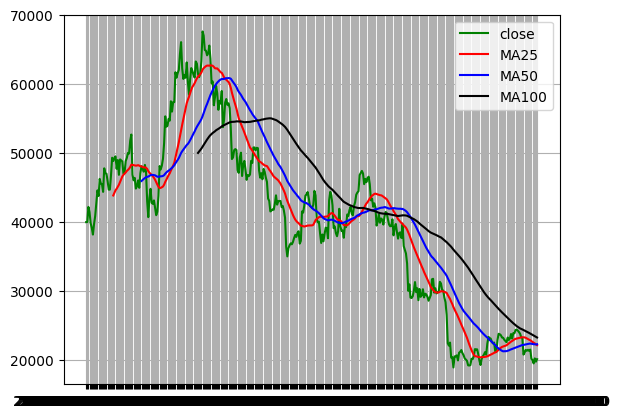

In [8]:

import matplotlib.pyplot as plt
plt.style.use('default')
plt.plot(df['date'], df['close'], 'g', label = 'close')
plt.plot(df['date'], df['MA25'], 'r', label = 'MA25')
plt.plot(df['date'], df['MA50'], 'b', label = 'MA50')
plt.plot(df['date'], df['MA100'], 'k', label = 'MA100')
plt.legend()
plt.grid()
plt.show()